# 데이터 불러오기

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd       # pandas library 불러내기
import numpy as np        # numpy library 불러내기

#pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
#pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화

#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/KR_youtube_trending_data.csv')
df = pd.read_csv('./KR_youtube_trending_data.csv')
                                             # 데이터파일을 불러와서 데이터프레임(df)에 저장
df.head(3)                                   # 데이터프레임(df)를 3행까기 보여주기

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN


In [3]:
df.shape

(261954, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261954 entries, 0 to 261953
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           261954 non-null  object
 1   title              261954 non-null  object
 2   publishedAt        261954 non-null  object
 3   channelId          261954 non-null  object
 4   channelTitle       261954 non-null  object
 5   categoryId         261954 non-null  int64 
 6   trending_date      261954 non-null  object
 7   tags               261954 non-null  object
 8   view_count         261954 non-null  int64 
 9   likes              261954 non-null  int64 
 10  dislikes           261954 non-null  int64 
 11  comment_count      261954 non-null  int64 
 12  thumbnail_link     261954 non-null  object
 13  comments_disabled  261954 non-null  bool  
 14  ratings_disabled   261954 non-null  bool  
 15  description        257197 non-null  object
dtypes: bool(2), int64(5)

# ID 변수 설정

In [5]:
# ID 변수: video_id
df['video_id'].duplicated().sum()

233996

In [6]:
df.drop_duplicates(subset=['video_id'], keep='first', inplace=True)

In [7]:
df['video_id'].duplicated().sum()

0

In [8]:
df.shape

(27958, 16)

# 타겟변수 생성

In [9]:
# 타깃 변수: view_count
df['view_count'].dtype

dtype('int64')

In [10]:
df['view_count'].isnull().sum()

0

In [11]:
print(df['view_count'].median())

view_count_median = df['view_count'].median()

df.loc[df['view_count'] >= view_count_median, "view_count_B"] = 1
df.loc[df['view_count'] <  view_count_median, "view_count_B"] = 0

print()
print(df['view_count_B'].value_counts(dropna=False))
print()
print(df['view_count_B'].value_counts(dropna=False, normalize=True))

358972.5

view_count_B
1.0    13979
0.0    13979
Name: count, dtype: int64

view_count_B
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


# 기타 변수 데이터 처리

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27958 entries, 0 to 261814
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_id           27958 non-null  object 
 1   title              27958 non-null  object 
 2   publishedAt        27958 non-null  object 
 3   channelId          27958 non-null  object 
 4   channelTitle       27958 non-null  object 
 5   categoryId         27958 non-null  int64  
 6   trending_date      27958 non-null  object 
 7   tags               27958 non-null  object 
 8   view_count         27958 non-null  int64  
 9   likes              27958 non-null  int64  
 10  dislikes           27958 non-null  int64  
 11  comment_count      27958 non-null  int64  
 12  thumbnail_link     27958 non-null  object 
 13  comments_disabled  27958 non-null  bool   
 14  ratings_disabled   27958 non-null  bool   
 15  description        27389 non-null  object 
 16  view_count_B       27958 n

In [13]:
df.loc[pd.notnull(df['description']), "description_B"] = 1
df.loc[pd.isnull(df['description']), "description_B"] = 0
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,view_count_B,description_B
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN,1.0,0.0
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",1.0,1.0
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN,1.0,0.0
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,1.0,1.0
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,1.0,1.0


In [14]:
df['publishedAt_N'] = pd.to_datetime(df['publishedAt'], format="%Y-%m-%dT%H:%M:%SZ").astype('int64') / 10**9

In [15]:
df['publishedAt_N'].head()

0    1.596966e+09
1    1.597223e+09
2    1.597053e+09
3    1.597158e+09
4    1.597136e+09
Name: publishedAt_N, dtype: float64

In [16]:
# 영향을 주는 변수
print("-구간 변수")
print(f"categoryId:\t{df['categoryId'].isnull().sum()}")
print(f"likes:\t\t{df['likes'].isnull().sum()}")
print(f"dislikes:\t{df['dislikes'].isnull().sum()}")
print(f"comment_count:\t{df['comment_count'].isnull().sum()}")
print(f"publishedAt_N:\t{df['publishedAt_N'].isnull().sum()}")
print()
print("-범주형 변수")
print(f"channelId:\t{df['channelId'].isnull().sum()}")
print(f"tags:\t\t{df['tags'].isnull().sum()}")
print(f"description_B:\t{df['description_B'].isnull().sum()}")

-구간 변수
categoryId:	0
likes:		0
dislikes:	0
comment_count:	0
publishedAt_N:	0

-범주형 변수
channelId:	0
tags:		0
description_B:	0


# 결측값 50% 초과 변수 제거

In [17]:
df.isna().any()[lambda x: x]

description    True
dtype: bool

In [18]:
df.isna().any()

video_id             False
title                False
publishedAt          False
channelId            False
channelTitle         False
categoryId           False
trending_date        False
tags                 False
view_count           False
likes                False
dislikes             False
comment_count        False
thumbnail_link       False
comments_disabled    False
ratings_disabled     False
description           True
view_count_B         False
description_B        False
publishedAt_N        False
dtype: bool

In [19]:
df['description'].isnull().mean()

0.020351956506187853

# 요약통계 및 도수분포표 점검

In [20]:
# 구간 변수 저장
cols = ['categoryId','likes','dislikes', 'comment_count', 'publishedAt_N']

# 구간 변수의 요약통계 구하기
df[cols].describe()

,categoryId,likes,dislikes,comment_count,publishedAt_N
count,27958.000000,2.795800e+04,27958.000000,2.795800e+04,2.795800e+04
mean,20.379677,4.843043e+04,305.569032,4.557245e+03,1.648053e+09
std,6.057724,2.394041e+05,3998.919615,4.283992e+04,3.374195e+07
min,1.000000,0.000000e+00,0.000000,0.000000e+00,1.596593e+09
25%,17.000000,3.932250e+03,0.000000,3.770000e+02,1.617872e+09
50%,23.000000,7.893000e+03,0.000000,8.560000e+02,1.644795e+09
75%,24.000000,1.849975e+04,119.000000,2.031750e+03,1.677563e+09
max,29.000000,9.825911e+06,405428.000000,3.400571e+06,1.711496e+09


In [21]:
# +-3 체크
# 클수록 좌측, 작을수록 우측으로 치우침
df[cols].skew()

categoryId       -1.565422
likes            14.040708
dislikes         74.055995
comment_count    42.974386
publishedAt_N     0.212969
dtype: float64

In [22]:
# +-10 체크
# 클수록 피크가 높음
df[cols].kurtosis()

categoryId          1.815184
likes             296.185485
dislikes         6916.895574
comment_count    2474.718909
publishedAt_N      -1.205690
dtype: float64

In [23]:
# 왜도와 첨도 계산 함수
def calculate_skew_kurtosis(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        skewness = df[column].skew()
        kurt = df[column].kurtosis()
        print(f'{column}: skewness={skewness}, kurtosis={kurt}')
    print('\n\n\n')

# 왜도와 첨도 값 출력
calculate_skew_kurtosis(df)

# 다양한 변환 적용 함수
def transform_features(df):
    for column in cols:
        skewness = df[column].skew()
        kurt = df[column].kurtosis()

        # 절대 왜도와 첨도가 특정 임계값을 넘는 경우 변환 시도
        if abs(skewness) > 3 or abs(kurt) > 10 or abs(skewness) < -3 or abs(kurt) < -10 :
            print(f'Transforming {column} (skewness={skewness}, kurtosis={kurt})')

            # 로그 변환
            df.loc[:, column + '_log'] = np.log1p(df[column] - df[column].min() + 1)

            # 제곱근 변환
            df.loc[:, column + '_sqrt'] = np.sqrt(df[column] - df[column].min() + 1)

            # 역수 변환
            df.loc[:, column + '_reciprocal'] = 1 / (df[column] - df[column].min() + 1)

    return df

# 변환 적용
df_transformed = transform_features(df)

# 변환 후 왜도와 첨도 값 출력
calculate_skew_kurtosis(df_transformed)

categoryId: skewness=-1.5654220945222403, kurtosis=1.8151839310162594
view_count: skewness=16.325205644700148, kurtosis=377.98937825664103
likes: skewness=14.040707932473104, kurtosis=296.1854848845046
dislikes: skewness=74.05599515470149, kurtosis=6916.8955738525465
comment_count: skewness=42.97438561190994, kurtosis=2474.7189086169715
view_count_B: skewness=0.0, kurtosis=-2.000143087104275
description_B: skewness=-6.794192600548355, kurtosis=44.16421241382592
publishedAt_N: skewness=0.21296885471243207, kurtosis=-1.2056897478284243




Transforming likes (skewness=14.040707932473104, kurtosis=296.1854848845046)
Transforming dislikes (skewness=74.05599515470149, kurtosis=6916.8955738525465)
Transforming comment_count (skewness=42.97438561190994, kurtosis=2474.7189086169715)
categoryId: skewness=-1.5654220945222403, kurtosis=1.8151839310162594
view_count: skewness=16.325205644700148, kurtosis=377.98937825664103
likes: skewness=14.040707932473104, kurtosis=296.1854848845046
dislikes: sk

In [24]:
df_transformed = df_transformed.drop(['likes_sqrt', 'likes_reciprocal', 'dislikes_sqrt', 'dislikes_reciprocal', 'comment_count_sqrt', 'comment_count_reciprocal'], axis=1)

In [25]:
df_transformed.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,thumbnail_link,comments_disabled,ratings_disabled,description,view_count_B,description_B,publishedAt_N,likes_log,dislikes_log,comment_count_log
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,...,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN,1.0,0.0,1.596966e+09,10.884217,11.568909,11.849026
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,...,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",1.0,1.0,1.597223e+09,10.248707,6.206576,8.114025
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,...,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN,1.0,0.0,1.597053e+09,9.796793,11.140411,10.833484
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,...,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,1.0,1.0,1.597158e+09,10.515831,7.495542,9.077152
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,...,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,1.0,1.0,1.597136e+09,12.775183,9.186560,10.060790


# 이상값 제거

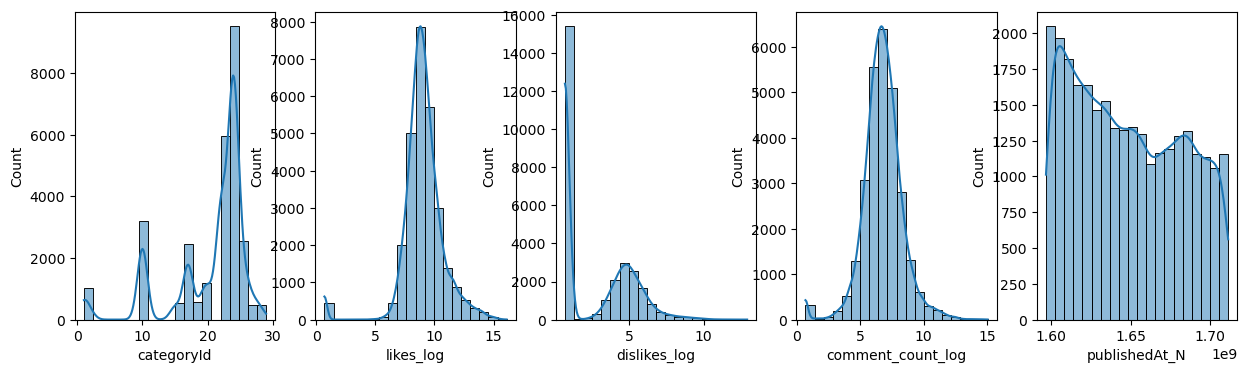

In [26]:
import matplotlib.pyplot as plt

import seaborn as sns

fig, axes = plt.subplots(1, 5, figsize=(15, 4))

sns.histplot(ax=axes[0], data=df_transformed, x="categoryId", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df_transformed, x="likes_log", kde=True, bins=20);
sns.histplot(ax=axes[2], data=df_transformed, x="dislikes_log", kde=True, bins=20)
sns.histplot(ax=axes[3], data=df_transformed, x="comment_count_log", kde=True, bins=20)
sns.histplot(ax=axes[4], data=df_transformed, x="publishedAt_N", kde=True, bins=20)

plt.show();

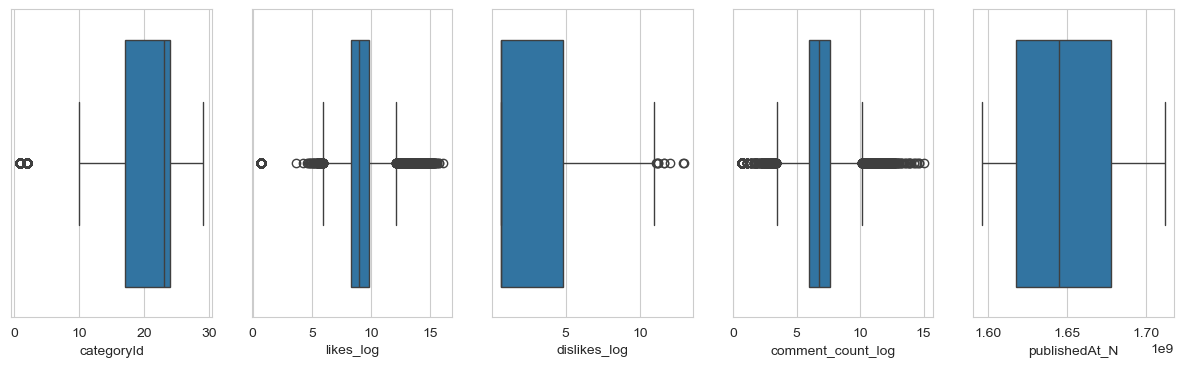

In [27]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 5, figsize=(15, 4))

sns.boxplot(ax=axes[0], x = 'categoryId', data = df_transformed)
sns.boxplot(ax=axes[1], x = 'likes_log', data = df_transformed)
sns.boxplot(ax=axes[2], x = 'dislikes_log', data = df_transformed);
sns.boxplot(ax=axes[3], x = 'comment_count_log', data = df_transformed);
sns.boxplot(ax=axes[4], x = 'publishedAt_N', data = df_transformed);

In [28]:
# 구간변수별 IQR 구하기
cols = ['categoryId','likes_log','dislikes_log', 'comment_count_log', 'publishedAt_N']

Q1 = df_transformed[cols].quantile(0.25)
Q3 = df_transformed[cols].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

categoryId           7.000000e+00
likes_log            1.548145e+00
dislikes_log         4.102643e+00
comment_count_log    1.680100e+00
publishedAt_N        5.969044e+07
dtype: float64


In [29]:
# 하한 구하기
Lower = Q1-3.0*IQR

# 상한 구하기
Upper = Q3+3.0*IQR

print("--상한--")
print(Upper)
print()
print("--하한--")
print(Lower)

--상한--
categoryId           4.500000e+01
likes_log            1.447006e+01
dislikes_log         1.710372e+01
comment_count_log    1.265794e+01
publishedAt_N        1.856634e+09
dtype: float64

--하한--
categoryId          -4.000000e+00
likes_log            3.633040e+00
dislikes_log        -1.161478e+01
comment_count_log    8.972349e-01
publishedAt_N        1.438801e+09
dtype: float64


In [30]:
df_transformed[cols].max()

categoryId           2.900000e+01
likes_log            1.610053e+01
dislikes_log         1.291270e+01
comment_count_log    1.503945e+01
publishedAt_N        1.711496e+09
dtype: float64

In [31]:
df_transformed[cols].min()

categoryId           1.000000e+00
likes_log            6.931472e-01
dislikes_log         6.931472e-01
comment_count_log    6.931472e-01
publishedAt_N        1.596593e+09
dtype: float64

In [32]:
def trim_outliers(df, columns, lower, upper):
    df_copy = df.copy()
    for column in columns:
      df_copy = df_copy[(df_copy[column] >= lower[column]) & (df_copy[column] <= upper[column])]
    return df_copy

In [33]:
trimmed_df = trim_outliers(df_transformed, cols, Lower, Upper)

In [34]:
trimmed_df[cols].max()

categoryId           2.900000e+01
likes_log            1.446677e+01
dislikes_log         1.156891e+01
comment_count_log    1.263365e+01
publishedAt_N        1.711496e+09
dtype: float64

In [35]:
trimmed_df[cols].min()

categoryId           1.000000e+00
likes_log            3.663562e+00
dislikes_log         6.931472e-01
comment_count_log    1.098612e+00
publishedAt_N        1.596593e+09
dtype: float64

# 상관관계 검토

In [36]:
cols = ['categoryId','likes_log','dislikes_log', 'comment_count_log', 'publishedAt_N']
round(trimmed_df[cols].corr(), 2)

,categoryId,likes_log,dislikes_log,comment_count_log,publishedAt_N
categoryId,1.00,-0.23,-0.02,-0.22,-0.01
likes_log,-0.23,1.00,0.12,0.80,0.04
dislikes_log,-0.02,0.12,1.00,0.24,-0.80
comment_count_log,-0.22,0.80,0.24,1.00,-0.08
publishedAt_N,-0.01,0.04,-0.80,-0.08,1.00


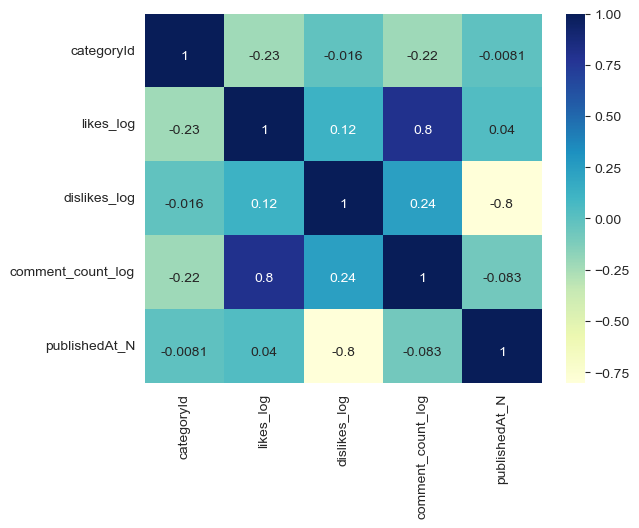

In [37]:
# x1과 x2의 변화 비율이 대략 0.7을 넘기면 안된다. => 머신러닝의 가중치 값이 망가지기 때문
import seaborn as sns

corr = trimmed_df[cols].corr()
annot_kws = {"ha": 'center',"va": 'top'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu");

In [38]:
trimmed_df.to_csv('./KR_youtube_trending_data_without_manufacturing2.csv', index=False)

# t-검정

In [39]:
import pandas as pd       # pandas library 불러내기
import numpy as np        # numpy library 불러내기

#pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
#pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화

df = pd.read_csv('./KR_youtube_trending_data_without_manufacturing2.csv', lineterminator='\n')
                                             # 데이터파일을 불러와서 데이터프레임(df)에 저장
df.head(3)                                   # 데이터프레임(df)를 3행까기 보여주기

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,thumbnail_link,comments_disabled,ratings_disabled,description,view_count_B,description_B,publishedAt_N,likes_log,dislikes_log,comment_count_log
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,...,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN,1.0,0.0,1.596966e+09,10.884217,11.568909,11.849026
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,...,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",1.0,1.0,1.597223e+09,10.248707,6.206576,8.114025
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,...,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN,1.0,0.0,1.597053e+09,9.796793,11.140411,10.833484


In [40]:
from scipy import stats

data_1 = df[df['view_count_B'] == 1]['categoryId']
data_0 = df[df['view_count_B'] == 0]['categoryId']

stats.ttest_ind(data_1, data_0)

TtestResult(statistic=-10.287073673878105, pvalue=8.950174107602836e-25, df=27120.0)

In [41]:
data_1 = df[df['view_count_B'] == 1]['likes_log']
data_0 = df[df['view_count_B'] == 0]['likes_log']

stats.ttest_ind(data_1, data_0)

TtestResult(statistic=112.36688731423074, pvalue=0.0, df=27120.0)

In [42]:
data_1 = df[df['view_count_B'] == 1]['dislikes_log']
data_0 = df[df['view_count_B'] == 0]['dislikes_log']

stats.ttest_ind(data_1, data_0)

TtestResult(statistic=15.809120061821243, pvalue=4.793032702217625e-56, df=27120.0)

In [43]:
data_1 = df[df['view_count_B'] == 1]['comment_count_log']
data_0 = df[df['view_count_B'] == 0]['comment_count_log']

stats.ttest_ind(data_1, data_0)

TtestResult(statistic=103.95108113919788, pvalue=0.0, df=27120.0)

In [44]:
data_1 = df[df['view_count_B'] == 1]['publishedAt_N']
data_0 = df[df['view_count_B'] == 0]['publishedAt_N']

stats.ttest_ind(data_1, data_0)

TtestResult(statistic=5.513531930195251, pvalue=3.549059246154065e-08, df=27120.0)

In [45]:
df = df.drop(['likes_log'], axis=1)

In [46]:
df.to_csv('./KR_youtube_trending_data_without_manufacturing3.csv', index=False)

# 데이터 추가 처리


In [47]:
import pandas as pd       # pandas library 불러내기
import numpy as np        # numpy library 불러내기

#pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
#pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화

df = pd.read_csv('./KR_youtube_trending_data_without_manufacturing3.csv', lineterminator='\n')
                                             # 데이터파일을 불러와서 데이터프레임(df)에 저장
df.head(3)                                   # 데이터프레임(df)를 3행까기 보여주기

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,view_count_B,description_B,publishedAt_N,dislikes_log,comment_count_log
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,...,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN,1.0,0.0,1.596966e+09,11.568909,11.849026
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,...,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",1.0,1.0,1.597223e+09,6.206576,8.114025
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,...,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN,1.0,0.0,1.597053e+09,11.140411,10.833484


In [48]:
df.dtypes

video_id              object
title                 object
publishedAt           object
channelId             object
channelTitle          object
categoryId             int64
trending_date         object
tags                  object
view_count             int64
likes                  int64
dislikes               int64
comment_count          int64
thumbnail_link        object
comments_disabled       bool
ratings_disabled        bool
description           object
view_count_B         float64
description_B        float64
publishedAt_N        float64
dislikes_log         float64
comment_count_log    float64
dtype: object

In [49]:
# 사용하지 않을 변수 제거
cols = ['title', 'publishedAt', 'channelTitle', 'trending_date', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']
df1 = df.drop(cols, axis=1)

In [50]:
df1.dtypes

video_id              object
channelId             object
categoryId             int64
tags                  object
view_count_B         float64
description_B        float64
publishedAt_N        float64
dislikes_log         float64
comment_count_log    float64
dtype: object

In [51]:
# 태그 분리 램오버로 불가능해 태그 드랍

'''
# 모든 태그를 포함하는 집합 생성
all_tags = set('|'.join(df1['tags']).split('|'))

# 각 태그에 대해 열을 생성하고 초기값 0 할당
for tag in all_tags:
    df1[f'tags_{tag}'] = 0

# 태그가 포함되어 있으면 해당 열에 1 할당
for idx, row in df1.iterrows():
    tags_list = row['tags'].split('|')
    for tag in tags_list:
        df1.loc[idx, f'tags_{tag}'] = 1

df1.head()
'''

"\n# 모든 태그를 포함하는 집합 생성\nall_tags = set('|'.join(df1['tags']).split('|'))\n\n# 각 태그에 대해 열을 생성하고 초기값 0 할당\nfor tag in all_tags:\n    df1[f'tags_{tag}'] = 0\n\n# 태그가 포함되어 있으면 해당 열에 1 할당\nfor idx, row in df1.iterrows():\n    tags_list = row['tags'].split('|')\n    for tag in tags_list:\n        df1.loc[idx, f'tags_{tag}'] = 1\n\ndf1.head()\n"

In [52]:
df1 = df1.drop(['tags'], axis=1)
df1.dtypes

video_id              object
channelId             object
categoryId             int64
view_count_B         float64
description_B        float64
publishedAt_N        float64
dislikes_log         float64
comment_count_log    float64
dtype: object

In [53]:
df_with_dummies = pd.get_dummies(df1, columns = ['channelId'])
df_with_dummies.head(2)

,video_id,categoryId,view_count_B,description_B,publishedAt_N,dislikes_log,comment_count_log,channelId_UC-0229MiVYnQoUxdLJnFl_g,channelId_UC-0C8yVGJy-cS4FGlYKelWw,channelId_UC-0tICWyA0_AJAVMBHL8GdQ,...,channelId_UCzm5GOElgUN-oLutNduDObA,channelId_UCznImSIaxZR7fdLCICLdgaQ,channelId_UCzpOLMBZ6qxhb6GJ5eksq5A,channelId_UCzt24ffdUiJvJAm5HY084aw,channelId_UCzteSXznVjwESizsCcSKSWw,channelId_UCzw-C7fNfs018R1FzIKnlaA,channelId_UCzxXBQnJy9guqVNM6KXi0Ig,channelId_UCzz58-H0wzmGoFi3MO_9ePQ,channelId_UCzznO4xSV8BKnUBPyswtCUw,channelId_UCzzt6bFEBcy-CoZeFvTSq0A
0,uq5LClQN3cE,24,1.0,0.0,1.596966e+09,11.568909,11.849026,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,I-ZbZCHsHD0,1,1.0,1.0,1.597223e+09,6.206576,8.114025,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
bool_columns = df_with_dummies.select_dtypes(include=['bool']).columns
for column in bool_columns:
  df_with_dummies[column] = df_with_dummies[column].astype(int)

In [55]:
df_with_dummies.head(2)

,video_id,categoryId,view_count_B,description_B,publishedAt_N,dislikes_log,comment_count_log,channelId_UC-0229MiVYnQoUxdLJnFl_g,channelId_UC-0C8yVGJy-cS4FGlYKelWw,channelId_UC-0tICWyA0_AJAVMBHL8GdQ,...,channelId_UCzm5GOElgUN-oLutNduDObA,channelId_UCznImSIaxZR7fdLCICLdgaQ,channelId_UCzpOLMBZ6qxhb6GJ5eksq5A,channelId_UCzt24ffdUiJvJAm5HY084aw,channelId_UCzteSXznVjwESizsCcSKSWw,channelId_UCzw-C7fNfs018R1FzIKnlaA,channelId_UCzxXBQnJy9guqVNM6KXi0Ig,channelId_UCzz58-H0wzmGoFi3MO_9ePQ,channelId_UCzznO4xSV8BKnUBPyswtCUw,channelId_UCzzt6bFEBcy-CoZeFvTSq0A
0,uq5LClQN3cE,24,1.0,0.0,1.596966e+09,11.568909,11.849026,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,I-ZbZCHsHD0,1,1.0,1.0,1.597223e+09,6.206576,8.114025,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
list(df_with_dummies.columns)

['video_id',
 'categoryId',
 'view_count_B',
 'description_B',
 'publishedAt_N',
 'dislikes_log',
 'comment_count_log',
 'channelId_UC-0229MiVYnQoUxdLJnFl_g',
 'channelId_UC-0C8yVGJy-cS4FGlYKelWw',
 'channelId_UC-0tICWyA0_AJAVMBHL8GdQ',
 'channelId_UC-2Y8dQb0S6DtpxNgAKoJKA',
 'channelId_UC-2wa6jvprl7hfCpvw0ULzg',
 'channelId_UC-3Fh1L6hOSV9ylvpr5g8_Q',
 'channelId_UC-5acDjU6XFWu-__G17V_YQ',
 'channelId_UC-603KNB_fvzHP9MpBqSKWg',
 'channelId_UC-60AlFBYJEoItr-u-tQXbw',
 'channelId_UC-7ZO1RZQq4O_xq9Zu8CyOg',
 'channelId_UC-9RQCJ0gS_Kgt7J0SVrE8w',
 'channelId_UC-BqPABOl7c7rR5EoJJZ0UA',
 'channelId_UC-Bsa2ivAGWq7bsSPrPGFVA',
 'channelId_UC-EGSdvtv-2DU0379QyjamQ',
 'channelId_UC-FQUIVQ-bZiefzBiQAa8Fw',
 'channelId_UC-FaJiyj_aXKCRwvnIHsQhw',
 'channelId_UC-Fnix71vRP64WXeo0ikd0Q',
 'channelId_UC-GmBxdeL-vxnO1qc0en2bg',
 'channelId_UC-IBt8pM8hWx8wiwjcDLdIQ',
 'channelId_UC-IG_h142pRnsilk8TkoZxA',
 'channelId_UC-IPoGHVF1W1_uwm4byBimA',
 'channelId_UC-IYpdOqjkER7B6cnChwlhA',
 'channelId_UC-IfewS80

In [57]:
df_with_dummies.dtypes

video_id                               object
categoryId                              int64
view_count_B                          float64
description_B                         float64
publishedAt_N                         float64
                                       ...   
channelId_UCzw-C7fNfs018R1FzIKnlaA      int64
channelId_UCzxXBQnJy9guqVNM6KXi0Ig      int64
channelId_UCzz58-H0wzmGoFi3MO_9ePQ      int64
channelId_UCzznO4xSV8BKnUBPyswtCUw      int64
channelId_UCzzt6bFEBcy-CoZeFvTSq0A      int64
Length: 3424, dtype: object

In [58]:
df_with_dummies.to_csv('./KR_youtube_trending_data_without_manufacturing4.csv', index=False)

# 로지스틱 회귀(Logistic Regression) 분류 모델

In [59]:
import pandas as pd       # pandas library 불러내기
import numpy as np        # numpy library 불러내기

#pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
#pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화

df = pd.read_csv('./KR_youtube_trending_data_without_manufacturing4.csv', lineterminator='\n')
                                             # 데이터파일을 불러와서 데이터프레임(df)에 저장
df.head(3)                               # 데이터프레임(df)를 3행까기 보여주기

,video_id,categoryId,view_count_B,description_B,publishedAt_N,dislikes_log,comment_count_log,channelId_UC-0229MiVYnQoUxdLJnFl_g,channelId_UC-0C8yVGJy-cS4FGlYKelWw,channelId_UC-0tICWyA0_AJAVMBHL8GdQ,...,channelId_UCzm5GOElgUN-oLutNduDObA,channelId_UCznImSIaxZR7fdLCICLdgaQ,channelId_UCzpOLMBZ6qxhb6GJ5eksq5A,channelId_UCzt24ffdUiJvJAm5HY084aw,channelId_UCzteSXznVjwESizsCcSKSWw,channelId_UCzw-C7fNfs018R1FzIKnlaA,channelId_UCzxXBQnJy9guqVNM6KXi0Ig,channelId_UCzz58-H0wzmGoFi3MO_9ePQ,channelId_UCzznO4xSV8BKnUBPyswtCUw,channelId_UCzzt6bFEBcy-CoZeFvTSq0A
0,uq5LClQN3cE,24,1.0,0.0,1.596966e+09,11.568909,11.849026,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,I-ZbZCHsHD0,1,1.0,1.0,1.597223e+09,6.206576,8.114025,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9d7jNUjBoss,22,1.0,0.0,1.597053e+09,11.140411,10.833484,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df1 = df.copy()
category_cols = df1.drop(['video_id', 'categoryId', 'view_count_B', 'description_B', 'publishedAt_N', 'dislikes_log', 'comment_count_log'], axis=1).columns.tolist()

df[category_cols] = df[category_cols].astype('category')

In [61]:
df.dtypes

video_id                                object
categoryId                               int64
view_count_B                           float64
description_B                          float64
publishedAt_N                          float64
                                        ...   
channelId_UCzw-C7fNfs018R1FzIKnlaA    category
channelId_UCzxXBQnJy9guqVNM6KXi0Ig    category
channelId_UCzz58-H0wzmGoFi3MO_9ePQ    category
channelId_UCzznO4xSV8BKnUBPyswtCUw    category
channelId_UCzzt6bFEBcy-CoZeFvTSq0A    category
Length: 3424, dtype: object

In [62]:
# ID 변수 drop
df.drop(['video_id'], axis=1, inplace=True)
# 기준 dummy 변수 drop
cols = ['channelId_UC-0229MiVYnQoUxdLJnFl_g']
df.drop(cols, axis=1, inplace=True)
df.shape

(27122, 3422)

In [63]:
data = df.drop(['view_count_B'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = df['view_count_B']                # 타겟변수만 target에 저장

In [64]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42, stratify=target)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (13561, 3421)
X_test shape: (13561, 3421)


Logistic Regression

In [83]:
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Logreg Training set score:0.50063
Logreg Test set score:0.50063


In [66]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',penalty=None,random_state=0,n_jobs=-1)

# 그리드 서치
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':[None]}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

/opt/anaconda3/envs/nsda/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/nsda/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/nsda/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/nsda/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/nsda/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV max accuracy:0.50063
GridSearchCV best parameter: {'penalty': None, 'solver': 'lbfgs'}


In [67]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.50063


In [68]:
print('절편', best_clf.intercept_)
print('회귀계수', best_clf.coef_)

절편 [-1.2732914e-20]
회귀계수 [[-6.31333592e-18 -2.72053031e-20 -5.94094682e-13 ... -3.58069581e-21
  -1.19357188e-21 -1.19355061e-21]]


In [69]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(best_clf.coef_.transpose(), index=feature_names,
                   columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=True)   # 컬럼 coef의 값들을 오름차순으로 정리
dft1

,coef
publishedAt_N,-5.940947e-13
categoryId,-6.313336e-18
channelId_UCR5cyf8hncN_AaQPfmvmlgA,-2.983653e-20
channelId_UChY4PXxJI0aJYsGT1X6INWA,-2.864433e-20
channelId_UCYZv9v_bwfMGc64gLRe34OA,-2.864304e-20
...,...
channelId_UCtm_QoN2SIxwCE-59shX7Qg,8.243815e-20
channelId_UCF4Wxdo3inmxP-Y59wXDsFw,8.601652e-20
channelId_UCEf_Bc-KVd7onSeifS3py9g,8.601763e-20
dislikes_log,3.445805e-18


In [70]:
# 변수명을 Index로 만들고 coefficient값을 제곱한 Odds ratio값을 Index에 매칭한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.exp(best_clf.coef_).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dft1

,Odds_ratio
channelId_UCzzt6bFEBcy-CoZeFvTSq0A,1.0
categoryId,1.0
description_B,1.0
channelId_UCzznO4xSV8BKnUBPyswtCUw,1.0
dislikes_log,1.0
...,...
channelId_UC-ORGzN6c-OZyCw9YAYNjkA,1.0
channelId_UC-OW8mKVeQF48oMsVNOpBVg,1.0
channelId_UC-OcDPFxfY9Hhdf5P9zq7-A,1.0
channelId_UC-QNLjGvjEdwqtl3VtcuqgQ,1.0


In [71]:
categoryId_odds_ratio = dft1.loc['categoryId', 'Odds_ratio']
description_B_odds_ratio = dft1.loc['description_B', 'Odds_ratio']
publishedAt_N_odds_ratio = dft1.loc['publishedAt_N', 'Odds_ratio']
dislikes_log_odds_ratio = dft1.loc['dislikes_log', 'Odds_ratio']
comment_count_log_odds_ratio = dft1.loc['comment_count_log', 'Odds_ratio']

print(f"Odds Ratio for 'categoryId': {categoryId_odds_ratio}")
print(f"Odds Ratio for 'description_B': {description_B_odds_ratio}")
print(f"Odds Ratio for 'publishedAt_N': {publishedAt_N_odds_ratio}")
print(f"Odds Ratio for 'dislikes_log': {dislikes_log_odds_ratio}")
print(f"Odds Ratio for 'comment_count_log': {comment_count_log_odds_ratio}")

Odds Ratio for 'categoryId': 1.0
Odds Ratio for 'description_B': 1.0
Odds Ratio for 'publishedAt_N': 0.9999999999994059
Odds Ratio for 'dislikes_log': 1.0
Odds Ratio for 'comment_count_log': 1.0


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np

def get_accuracy(model, X_test, y_test):
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print('{0} Accuracy: {1:.3f}'.format(model.__class__.__name__, acc))
    return acc

def get_precision(model, X_test, y_test):
    pred = model.predict(X_test)
    prec = precision_score(y_test, pred, average='macro', zero_division=0)
    print('{0} Precision (macro): {1:.3f}'.format(model.__class__.__name__, prec))
    return prec

def get_recall(model, X_test, y_test):
    pred = model.predict(X_test)
    rec = recall_score(y_test, pred, average='macro', zero_division=0)
    print('{0} Recall (macro): {1:.3f}'.format(model.__class__.__name__, rec))
    return rec

def get_f1(model, X_test, y_test):
    pred = model.predict(X_test)
    f1 = f1_score(y_test, pred, average='macro', zero_division=0)
    print('{0} F1 Score (macro): {1:.3f}'.format(model.__class__.__name__, f1))
    return f1

def get_roc_auc(model, X_test, y_test):
    try:
        proba = model.predict_proba(X_test)
        if proba.shape[1] == 2:
            auc = roc_auc_score(y_test, proba[:, 1])
        else:
            auc = roc_auc_score(y_test, proba, multi_class='ovo', average='macro')
        print('{0} ROC AUC: {1:.3f}'.format(model.__class__.__name__, auc))
        return auc
    except:
        print('{0} ROC AUC: Not Available (no predict_proba)'.format(model.__class__.__name__))
        return None

def get_classification_metrics(model, X_test, y_test):
    acc = get_accuracy(model, X_test, y_test)
    prec = get_precision(model, X_test, y_test)
    rec = get_recall(model, X_test, y_test)
    f1 = get_f1(model, X_test, y_test)
    auc = get_roc_auc(model, X_test, y_test)
    return acc, prec, rec, f1, auc

In [73]:
def print_classification_metrics(acc, prec, rec, f1, auc):
    print("분류 모델 평가 결과")
    print("="*40)
    print(f"Accuracy (정확도): {acc:.3f}")
    print("    → 전체 예측 중 정답 비율")

    print(f"Precision (정밀도, macro): {prec:.3f}")
    print("    → 예측한 것 중 실제로 맞은 비율 (클래스별 평균)")

    print(f"Recall (재현율, macro): {rec:.3f}")
    print("    → 실제 정답 중 예측이 맞은 비율 (클래스별 평균)")

    print(f"F1 Score (macro): {f1:.3f}")
    print("    → 정밀도와 재현율의 조화 평균")

    if auc is not None:
        print(f"ROC AUC: {auc:.3f}")
        print("    → 클래스 분리 능력 (1에 가까울수록 우수)")
    else:
        print("ROC AUC: 제공 불가 (predict_proba 없음)")

    print("="*40)

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_classification_model_comparison_with_values(results_dict, ylim=(0, 1), figsize=(10, 6)):
    """
    분류 모델별 평가 지표를 시각화하고, 각 지표마다 수치를 텍스트 박스로 표시

    Parameters:
        results_dict: {'모델이름': (ACC, PREC, REC, F1, ROC AUC)}
        figsize: 그래프 크기 (기본: (10, 6))
        ylim: y축 범위 (튜플, 기본: (0, 1))
    """
    # 지표 이름
    metric_names = ['ACC', 'PREC', 'REC', 'F1', 'ROC AUC']
    df = pd.DataFrame(results_dict, index=metric_names)

    # 시각화
    plt.figure(figsize=figsize)
    markers = ['o', 's', '^', 'D', 'v']  # 모델 수 많아질 대비

    for i, model_name in enumerate(df.columns):
        plt.plot(df.index, df[model_name], marker=markers[i % len(markers)], label=model_name)

    plt.title('분류 모델별 평가 지표 비교', fontsize=14)
    plt.ylabel('지표값')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()

    # y축 범위 지정
    plt.ylim(*ylim)

    # 각 지표별 박스 텍스트 추가
    for idx, metric in enumerate(df.index):
        y_values = df.loc[metric]
        max_y = y_values.max()
        margin = (ylim[1] - ylim[0]) * 0.05  # 상한-하한의 5%
        text_y = min(max_y + margin, ylim[1] * 1.02)  # ylim 상한을 넘지 않도록 조정

        text = "\n".join([f"{k}: {v:.3f}" for k, v in y_values.items()])
        plt.text(x=idx, y=text_y, s=text,
                 ha='center', va='bottom',
                 fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", alpha=0.8))

    plt.tight_layout()
    plt.show()


In [84]:
lg_metrics = get_classification_metrics(lr, X_test, y_test)
print_classification_metrics(*lg_metrics)

lg_grid_metrics = get_classification_metrics(grid_lr, X_test, y_test)
print_classification_metrics(*lg_grid_metrics)

LogisticRegression Accuracy: 0.501
LogisticRegression Precision (macro): 0.250
LogisticRegression Recall (macro): 0.500
LogisticRegression F1 Score (macro): 0.334
LogisticRegression ROC AUC: 0.479
분류 모델 평가 결과
Accuracy (정확도): 0.501
    → 전체 예측 중 정답 비율
Precision (정밀도, macro): 0.250
    → 예측한 것 중 실제로 맞은 비율 (클래스별 평균)
Recall (재현율, macro): 0.500
    → 실제 정답 중 예측이 맞은 비율 (클래스별 평균)
F1 Score (macro): 0.334
    → 정밀도와 재현율의 조화 평균
ROC AUC: 0.479
    → 클래스 분리 능력 (1에 가까울수록 우수)
GridSearchCV Accuracy: 0.501
GridSearchCV Precision (macro): 0.250
GridSearchCV Recall (macro): 0.500
GridSearchCV F1 Score (macro): 0.334
GridSearchCV ROC AUC: 0.479
분류 모델 평가 결과
Accuracy (정확도): 0.501
    → 전체 예측 중 정답 비율
Precision (정밀도, macro): 0.250
    → 예측한 것 중 실제로 맞은 비율 (클래스별 평균)
Recall (재현율, macro): 0.500
    → 실제 정답 중 예측이 맞은 비율 (클래스별 평균)
F1 Score (macro): 0.334
    → 정밀도와 재현율의 조화 평균
ROC AUC: 0.479
    → 클래스 분리 능력 (1에 가까울수록 우수)


현재 설정된 font.family: ['AppleGothic']
폰트 파일 경로: /System/Library/Fonts/Supplemental/AppleGothic.ttf


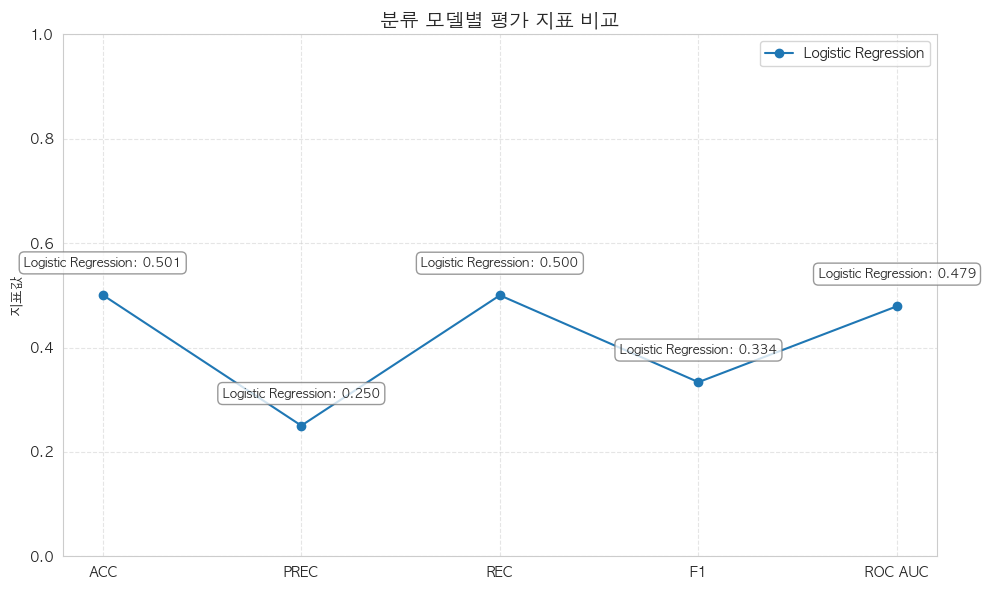

In [ ]:
from util_func import font_setter
font_setter('/System/Library/Fonts/Supplemental/AppleGothic.ttf')

results = {
    'Logistic Regression': lg_metrics,
    'LR with Grid Search': lg_with_grid_metrics
}

plot_classification_model_comparison_with_values(results, ylim=(0, 1), figsize=(10, 6))